     PassengerId  Survived  Pclass                           Name     Sex  \
4              5         0       3       Allen, Mr. William Henry    male   
730          731         1       1  Allen, Miss. Elisabeth Walton  female   

      Age  SibSp  Parch  Ticket      Fare Cabin Embarked  
4    35.0      0      0  373450    8.0500   NaN        S  
730  29.0      0      0   24160  211.3375    B5        S  


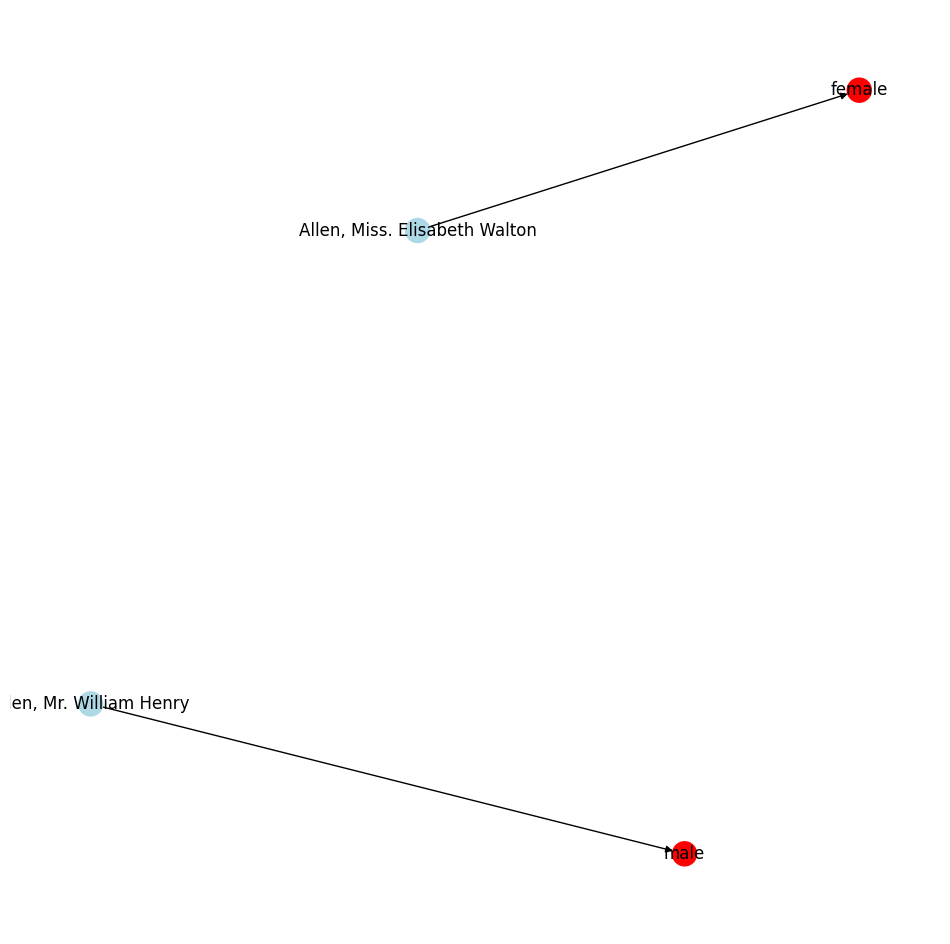

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Data = pd.read_csv('Titanic.csv')
nombre = "^" + input().capitalize() + ".*"
Data = Data[Data['Name'].str.match(nombre)==True]
print(Data)

fig, ax = plt.subplots(figsize =(12,12))

DG = nx.DiGraph()
for i in range(0, len(Data)):
    
    DG.add_edge(Data.iloc[i]['Name'], Data.iloc[i]['Sex'])
    i = i + 1 
genero = ["male", "female"]
nx.draw(DG, with_labels=True, node_color= ['red' if node in genero else 'lightblue' for node in DG.nodes()])
plt.show()

     PassengerId  Survived  Pclass                           Name     Sex  \
4              5         0       3       Allen, Mr. William Henry    male   
730          731         1       1  Allen, Miss. Elisabeth Walton  female   

      Age  SibSp  Parch  Ticket      Fare Cabin Embarked  
4    35.0      0      0  373450    8.0500   NaN        S  
730  29.0      0      0   24160  211.3375    B5        S  


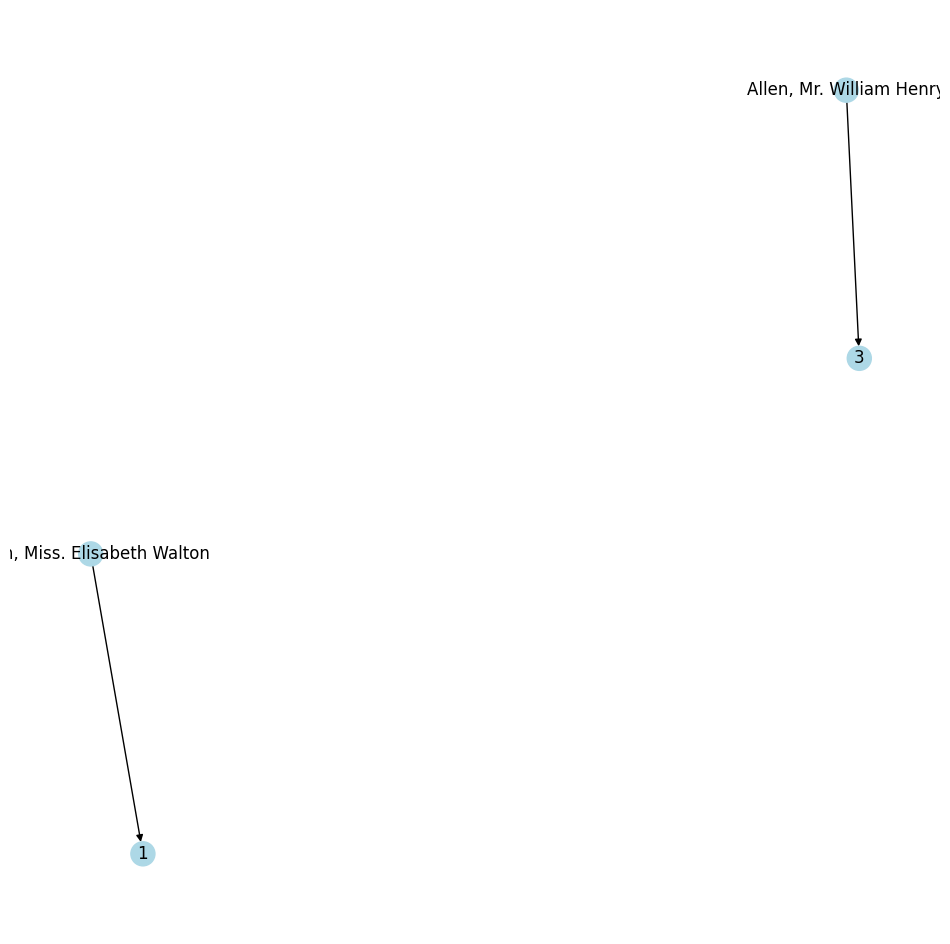

In [17]:
nombre = "^" + input().capitalize() + ".*"
Data = Data[Data['Name'].str.match(nombre)==True]
print(Data)

fig, ax = plt.subplots(figsize =(12,12))

DG = nx.DiGraph()
for i in range(0, len(Data)):
    
    DG.add_edge(Data.iloc[i]['Name'], Data.iloc[i]['Pclass'])
    i = i + 1 
clase = ["1", "2", "3"]
nx.draw(DG, with_labels=True, node_color= ['red' if node in clase else 'lightblue' for node in DG.nodes()])
plt.show()